In [1]:
!pip install torchinfo
import torch
import torch.optim as optim
from models import Net
from torchvision import transforms as T
from utils import Trainer, build_cifar, plot_misclassified, plot_sampledata

In [2]:
# Train data transformations
train_transforms = T.Compose(
    [
        T.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.40, hue=0.1),
        T.RandomRotation((-5.0, 5.0), fill=(0.49139968, 0.48215841, 0.44653091)),
        T.RandomHorizontalFlip(),
        T.ToTensor(),
        T.Normalize(
            (0.49139968, 0.48215841, 0.44653091),
            (0.24703223, 0.24348513, 0.26158784),
        ),
    ]
)

# Test data transformations
test_transforms = T.Compose([T.ToTensor(), T.Normalize((0.1307,), (0.3081,))])

batch_size = 64

kwargs = {
    "batch_size": batch_size,
    "shuffle": True,
    "num_workers": 2,
    "pin_memory": True,
}

train_data, train_loader = build_cifar(set="train", transforms=train_transforms, **kwargs)
test_data, test_loader = build_cifar(set="test", transforms=test_transforms, **kwargs)

100%|██████████| 170498071/170498071 [00:03<00:00, 56145535.21it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


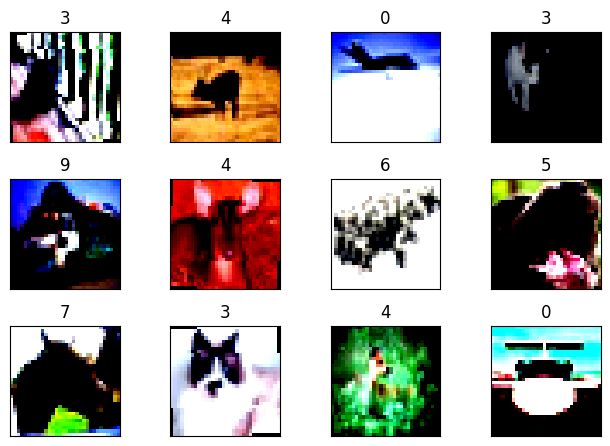

In [3]:
plot_sampledata(train_loader)

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net(norm="ln").to(device)

In [5]:
model.summarize(device, (1, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1, 10]                   --
├─Sequential: 1-1                        [1, 16, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 8, 32, 32]            216
│    └─ReLU: 2-2                         [1, 8, 32, 32]            --
│    └─GroupNorm: 2-3                    [1, 8, 32, 32]            16
│    └─Dropout2d: 2-4                    [1, 8, 32, 32]            --
│    └─Conv2d: 2-5                       [1, 16, 32, 32]           1,152
│    └─ReLU: 2-6                         [1, 16, 32, 32]           --
│    └─GroupNorm: 2-7                    [1, 16, 32, 32]           32
│    └─Dropout2d: 2-8                    [1, 16, 32, 32]           --
├─Sequential: 1-2                        [1, 8, 16, 16]            --
│    └─Conv2d: 2-9                       [1, 8, 32, 32]            128
│    └─ReLU: 2-10                        [1, 8, 32, 32]            --
│    └─Dro

In [6]:
num_epochs = 20
model = Net(drop=0.025, norm="ln").to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.OneCycleLR(
    optimizer, max_lr=0.01, epochs=num_epochs, steps_per_epoch=len(train_loader)
)
# scheduler = None

trainer = Trainer(model, device, optimizer, scheduler)
for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}")
    trainer.train(train_loader)
    trainer.test(test_loader)

Epoch 1


Train: Loss=1.9551 Batch_id=781 Accuracy=23.77: 100%|██████████| 782/782 [00:52<00:00, 14.88it/s]


Test set: Average loss: 1.7354, Accuracy: 3491/10000 (34.91%)

Epoch 2


Train: Loss=1.7362 Batch_id=781 Accuracy=36.64: 100%|██████████| 782/782 [00:49<00:00, 15.90it/s]


Test set: Average loss: 1.6488, Accuracy: 3929/10000 (39.29%)

Epoch 3


Train: Loss=1.5791 Batch_id=781 Accuracy=43.93: 100%|██████████| 782/782 [00:50<00:00, 15.62it/s]


Test set: Average loss: 1.4568, Accuracy: 4736/10000 (47.36%)

Epoch 4


Train: Loss=1.1012 Batch_id=781 Accuracy=48.93: 100%|██████████| 782/782 [00:50<00:00, 15.55it/s]


Test set: Average loss: 1.3130, Accuracy: 5429/10000 (54.29%)

Epoch 5


Train: Loss=1.5253 Batch_id=781 Accuracy=53.81: 100%|██████████| 782/782 [00:50<00:00, 15.61it/s]


Test set: Average loss: 1.1987, Accuracy: 5673/10000 (56.73%)

Epoch 6


Train: Loss=1.0030 Batch_id=781 Accuracy=56.54: 100%|██████████| 782/782 [00:49<00:00, 15.66it/s]


Test set: Average loss: 1.0942, Accuracy: 6123/10000 (61.23%)

Epoch 7


Train: Loss=1.1089 Batch_id=781 Accuracy=59.03: 100%|██████████| 782/782 [00:50<00:00, 15.46it/s]


Test set: Average loss: 1.0045, Accuracy: 6469/10000 (64.69%)

Epoch 8


Train: Loss=1.3279 Batch_id=781 Accuracy=61.09: 100%|██████████| 782/782 [00:52<00:00, 14.99it/s]


Test set: Average loss: 0.9845, Accuracy: 6479/10000 (64.79%)

Epoch 9


Train: Loss=1.0848 Batch_id=781 Accuracy=62.49: 100%|██████████| 782/782 [00:50<00:00, 15.53it/s]


Test set: Average loss: 0.9657, Accuracy: 6644/10000 (66.44%)

Epoch 10


Train: Loss=0.7420 Batch_id=781 Accuracy=64.00: 100%|██████████| 782/782 [00:50<00:00, 15.42it/s]


Test set: Average loss: 0.9082, Accuracy: 6825/10000 (68.25%)

Epoch 11


Train: Loss=0.6776 Batch_id=781 Accuracy=65.31: 100%|██████████| 782/782 [00:50<00:00, 15.34it/s]


Test set: Average loss: 0.8715, Accuracy: 6971/10000 (69.71%)

Epoch 12


Train: Loss=0.9874 Batch_id=781 Accuracy=66.36: 100%|██████████| 782/782 [00:50<00:00, 15.37it/s]


Test set: Average loss: 0.8472, Accuracy: 7066/10000 (70.66%)

Epoch 13


Train: Loss=1.7247 Batch_id=781 Accuracy=67.07: 100%|██████████| 782/782 [00:50<00:00, 15.45it/s]


Test set: Average loss: 0.8557, Accuracy: 7023/10000 (70.23%)

Epoch 14


Train: Loss=1.0478 Batch_id=781 Accuracy=67.82: 100%|██████████| 782/782 [00:50<00:00, 15.37it/s]


Test set: Average loss: 0.8118, Accuracy: 7190/10000 (71.90%)

Epoch 15


Train: Loss=0.6522 Batch_id=781 Accuracy=68.61: 100%|██████████| 782/782 [00:50<00:00, 15.36it/s]


Test set: Average loss: 0.7931, Accuracy: 7270/10000 (72.70%)

Epoch 16


Train: Loss=1.1161 Batch_id=781 Accuracy=69.18: 100%|██████████| 782/782 [00:50<00:00, 15.35it/s]


Test set: Average loss: 0.7918, Accuracy: 7236/10000 (72.36%)

Epoch 17


Train: Loss=0.5251 Batch_id=781 Accuracy=69.84: 100%|██████████| 782/782 [00:51<00:00, 15.32it/s]


Test set: Average loss: 0.7616, Accuracy: 7383/10000 (73.83%)

Epoch 18


Train: Loss=1.3856 Batch_id=781 Accuracy=70.95: 100%|██████████| 782/782 [00:51<00:00, 15.30it/s]


Test set: Average loss: 0.7485, Accuracy: 7446/10000 (74.46%)

Epoch 19


Train: Loss=1.0727 Batch_id=781 Accuracy=71.17: 100%|██████████| 782/782 [00:51<00:00, 15.13it/s]


Test set: Average loss: 0.7388, Accuracy: 7480/10000 (74.80%)

Epoch 20


Train: Loss=0.9266 Batch_id=781 Accuracy=71.37: 100%|██████████| 782/782 [00:51<00:00, 15.33it/s]


Test set: Average loss: 0.7371, Accuracy: 7495/10000 (74.95%)



Set\t Max Acc@Epoch	 Last Epoch Acc
train	 71.37@20		71.37
test	 74.95@20		74.95


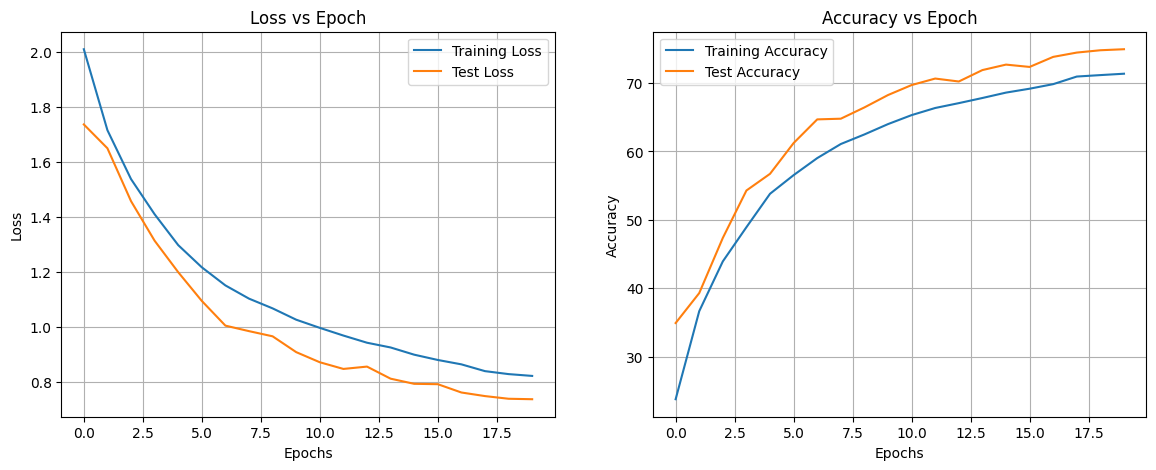

In [7]:
trainer.plot_history()

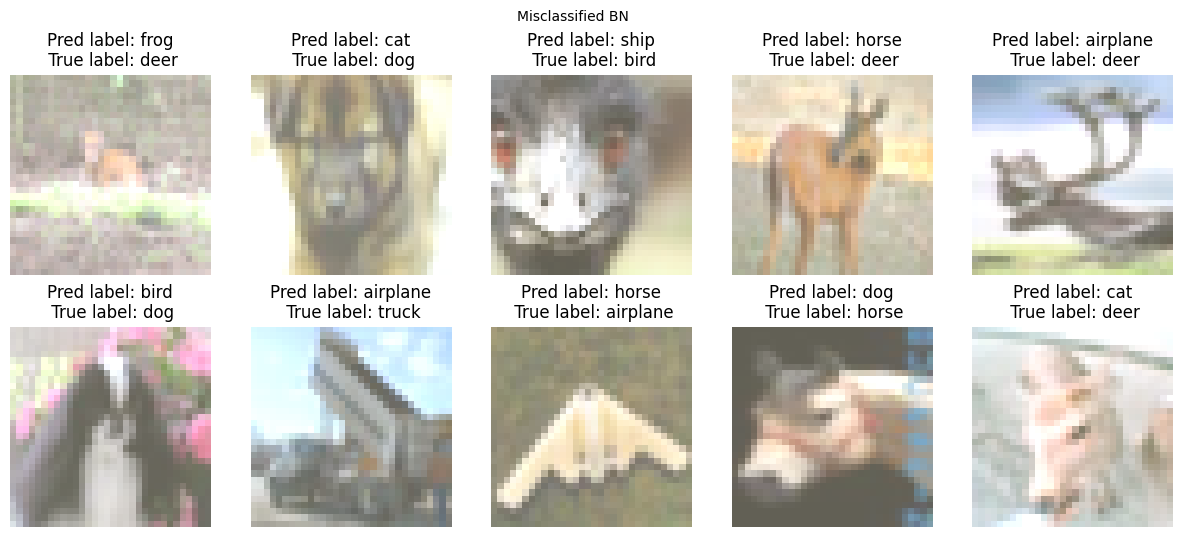

In [8]:
plot_misclassified(
    model,
    test_loader,
    device,
    (0.49139968, 0.48215841, 0.44653091),
    (0.24703223, 0.24348513, 0.26158784),
)